Recently, I was watching this objectively big youtuber named Mark Rober. About 4(ish) years ago, he posted a video that highlighted the benefits of a plant based diet and reducing the demand for meat in the world. I wanted to look into finding out the exact data for all of that and possibly use some of my data analysis skills to do so. Similar to how Mr. Rober did in his very popular video, we will be answering two very big questions:

1. Is it good for me?
2. Does it make that big of a difference for the enviornment.

First I had to find the proper data sets for what I was planning on accomplishing (which is to highlight the benefits of a plant based diet on the world, carbon emissions, and yourself)

In [49]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [50]:
df3 = pd.read_csv('Land use per gram of protein.csv')
df3

,Food Type,Year,Land Use (in sqm)
0,Beef/Mutton,2017,1.024301
1,Dairy,2017,0.044010
2,Eggs,2017,0.051358
3,Fresh Produce,2017,0.098235
4,Maize,2017,0.014354
5,Pork,2017,0.129945
6,Poultry,2017,0.075102
7,Pulses,2017,0.010395
8,Rice,2017,0.022885
9,Wheat,2017,0.035402


In [51]:
df2 = pd.read_csv('GHG-emissions-by-life-cycle-stage-OurWorldinData-upload.csv')
df2

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Unnamed: 8
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,NaN
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,NaN
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,NaN
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,NaN
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,NaN
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,NaN
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,NaN


Lets break down these datastes and what exactly they tell us:

1. The very top dataset shows us a couple of different food types and also how much land each type uses up. As we can tell, beef/mutton is the leading food type in land usage.
2. The second dataset also shows us some more values seperated by gofferend food groups. The idea for the visual below is all thanks to the creator of the dataset who I will reference at the end of this project but it helps a lot in understanding just how much methane production comes from beef that is herded for their meat rather than their dairy.

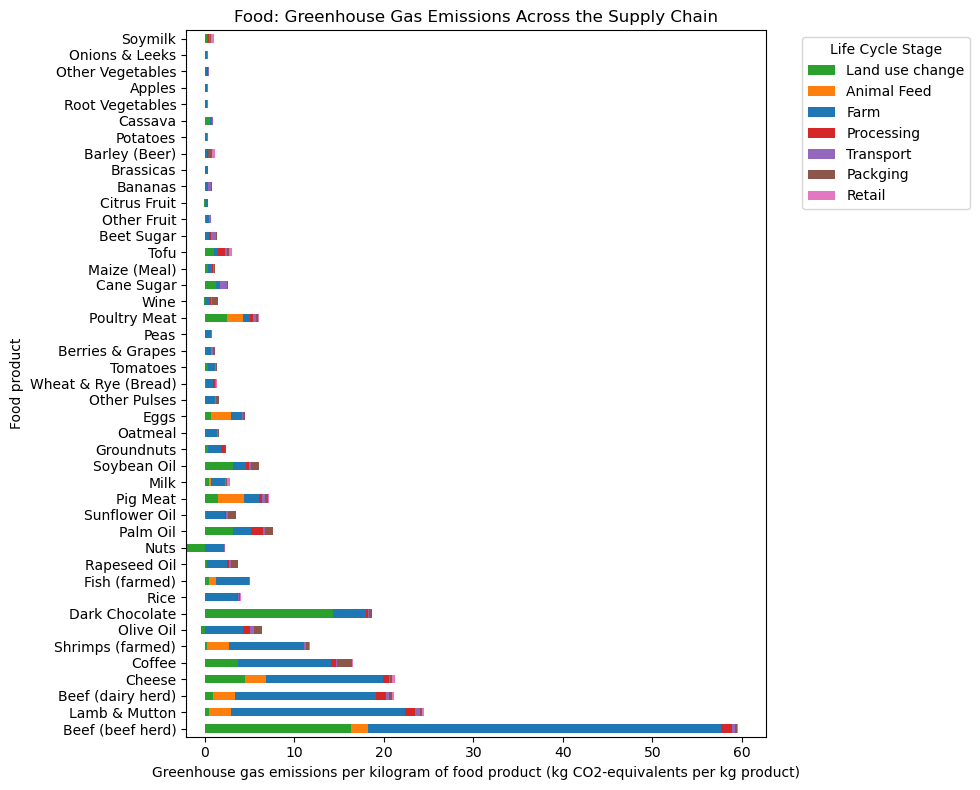

In [52]:
# Prepare data for plotting
df2_clean = df2.drop(columns=['Unnamed: 8'])
df2_clean.set_index('Food product', inplace=True)
df2_clean.sort_values(by='Farm', ascending=False, inplace=True)  # Sort by 'Farm' as a primary contributor

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 8))

# Plot stacked bar chart
df2_clean.plot(kind='barh', stacked=True, ax=ax, color=[
    '#2ca02c', '#ff7f0e', '#1f77b4', '#d62728', '#9467bd', '#8c564b', '#e377c2'
])

# Customize the plot
ax.set_xlabel('Greenhouse gas emissions per kilogram of food product (kg CO2-equivalents per kg product)')
ax.set_ylabel('Food product')
ax.set_title('Food: Greenhouse Gas Emissions Across the Supply Chain')
ax.legend(title='Life Cycle Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

Here's an explanation for each sector in the graph above:

1. Land use change - aboveground changes in biomass from deforestation, and belowground changes in soil carbon.
2. Farm - Methane emission from cows, methane from rice, emissions from fertilizers, manure, and farm machinery.
3. Animal feed - On-farm emissions from crop production and its processing into feed for livestock
4. Processing - Emissions from energy use in the process of converting raw agricultural products into final food items
5. Transport - Emissions from energy use in the transport of food items in-country and internationally.
6. Retail - Emissions from energy use in refrigeration and other retail processes
7. Packaging - Emissions from the production of packaging materials, material transport and end-of-life disposal

Here are some facts about the data I have shown in the graph above:

1. Transport emissions are very small for most food products.
2. Mathane production from cows, and land conversion for grazing and animal feed means beef from dedicated beef herds has a very high carbon footprint.
3. Dairy co-products means beef from dairy herds has a lower carbon footprint than dedicated beef herds.
4. Pigs and poultry are non-ruminant livestock meaning they do not produce methane. They have significantly loweremissions than beef and lamb.
5. Flodded rice produces mthane, which dominates on farm emissions.
6. Farm emissions for wild fish refers to fuel used by fishing boats or other vessels.
7. Mathane production from cows means milk with actual dairy hold higher emissions than plant-based milk such as almond or oat milk.
8. CO2 emissions from most plant based products are as much as 50 times lower than most animal-based products.
9. Factors such as transport distance, retail, and packaging are often small compared to importance or food-type.
10. Nuts have a negative land use change figure because nut trees are currently replacing croplands; carbon is stored in the trees.

Now as a note, GHG emissions or Greenhouse gas emissions are given as global average values based on data across 38,700 commercially viable farms in 119 countries (according to OurWorldinData.org)

Above, I have created a visual to represent dataset 2 or the Greenhouse gas emission dataset. That two big ones we're going to focus on are the blue bars and green bars or, farm and land use respectively. The last food product or the beef has a long scary blue bar because it uses ~35 kg of CO2 as a result of 1 kilogram of production in the farming sector and ~17 kg of CO2 as a result of 1 kilogram of production in the land use sector. 

Now as I mentioned earlier, plant-based foods carry almost 50 times lower emissions than animal-based products. This proves that a plant-based diet is significantly better for the environment as a normal human eats about 101.87685 kg of meat per year which means about 180 kg of CO2 emissions per year by just one human being. Cutting meat out of ones diet could drastically help our climate and the pollution problems in a lot of countries around the world.

At the beginning of this project I mentioned that I would be finding the answers to two different questions. Now that we've answered one of them, I'm going to answer the question on all of our minds: is a plant-based diet even that good for me?

Below is the dataset I will be using to answer this questions

In [53]:
df1 = pd.read_csv('food.csv')
df1

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,Tomatoes as ingredient in omelet,Tomatoes as ingredient in omelet,99997802,103,464,0,5.48,0,7.4,1.6,...,30,278,6,0.21,43,0.00,0.104,18.2,0.60,8.8
7079,Other vegetables as ingredient in omelet,Other vegetables as ingredient in omelet,99997804,1,11,0,4.81,0,19.4,1.4,...,96,364,6,0.58,1,0.04,0.123,6.3,0.03,0.4
7080,Vegetables as ingredient in curry,Vegetables as ingredient in curry,99997810,368,994,0,11.60,0,14.6,2.2,...,46,312,19,0.28,98,0.00,0.177,16.2,0.24,8.9
7081,Sauce as ingredient in hamburgers,Sauce as ingredient in hamburgers,99998130,0,194,4,17.14,13,20.0,0.6,...,33,190,845,0.21,21,0.04,0.104,2.5,1.90,50.8


In [54]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Convert DataFrame to SQL table
df1.to_sql('food_data', conn, index=False, if_exists='replace')

# Retrieve the column names
cursor.execute("PRAGMA table_info(food_data);")
columns_info = cursor.fetchall()

# Print the column names
for col in columns_info:
    print(col[1])

# Close the connection after inspection
conn.close()

Category
Description
Nutrient Data Bank Number
Data.Alpha Carotene
Data.Beta Carotene
Data.Beta Cryptoxanthin
Data.Carbohydrate
Data.Cholesterol
Data.Choline
Data.Fiber
Data.Lutein and Zeaxanthin
Data.Lycopene
Data.Niacin
Data.Protein
Data.Retinol
Data.Riboflavin
Data.Selenium
Data.Sugar Total
Data.Thiamin
Data.Water
Data.Fat.Monosaturated Fat
Data.Fat.Polysaturated Fat
Data.Fat.Saturated Fat
Data.Fat.Total Lipid
Data.Major Minerals.Calcium
Data.Major Minerals.Copper
Data.Major Minerals.Iron
Data.Major Minerals.Magnesium
Data.Major Minerals.Phosphorus
Data.Major Minerals.Potassium
Data.Major Minerals.Sodium
Data.Major Minerals.Zinc
Data.Vitamins.Vitamin A - RAE
Data.Vitamins.Vitamin B12
Data.Vitamins.Vitamin B6
Data.Vitamins.Vitamin C
Data.Vitamins.Vitamin E
Data.Vitamins.Vitamin K


In [55]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Convert DataFrame to SQL table
df1.to_sql('food_data', conn, index=False, if_exists='replace')

# SQL query to categorize diet types and aggregate the data using the correct column names
query = """
SELECT 
    CASE 
        WHEN Category IN ('Meat', 'Dairy', 'Eggs', 'Fish', 'Poultry') THEN 'Animal-Based'
        WHEN Category IN ('Vegetables', 'Fruits', 'Legumes', 'Grains', 'Nuts and Seeds') THEN 'Plant-Based'
        ELSE 'Other'
    END AS Diet_Type,
    AVG([Data.Cholesterol]) AS Avg_Cholesterol,
    AVG([Data.Fiber]) AS Avg_Fiber,
    AVG([Data.Major Minerals.Potassium]) AS Avg_Potassium,
    AVG([Data.Major Minerals.Sodium]) AS Avg_Sodium,
    AVG([Data.Vitamins.Vitamin C]) AS Avg_Vitamin_C,
    AVG([Data.Beta Carotene]) AS Avg_Beta_Carotene
FROM food_data
WHERE Category IN ('Meat', 'Dairy', 'Eggs', 'Fish', 'Poultry', 'Vegetables', 'Fruits', 'Legumes', 'Grains', 'Nuts and Seeds')
GROUP BY Diet_Type;
"""

# Execute the query and load the results into a DataFrame
aggregated_data = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the aggregated data
print(aggregated_data)

# Save the aggregated data to a CSV if needed
aggregated_data.to_csv('aggregated_food_data.csv', index=False)


      Diet_Type  Avg_Cholesterol  Avg_Fiber  Avg_Potassium  Avg_Sodium  \
0  Animal-Based        61.518519   0.385185     344.851852  627.185185   
1   Plant-Based         1.000000   1.900000     293.000000  438.666667   

   Avg_Vitamin_C  Avg_Beta_Carotene  
0       1.085185          58.259259  
1      18.600000        2272.333333  


In [56]:
df4 = pd.read_csv('aggregated_food_data.csv')
df4

,Diet_Type,Avg_Cholesterol,Avg_Fiber,Avg_Potassium,Avg_Sodium,Avg_Vitamin_C,Avg_Beta_Carotene
0,Animal-Based,61.518519,0.385185,344.851852,627.185185,1.085185,58.259259
1,Plant-Based,1.000000,1.900000,293.000000,438.666667,18.600000,2272.333333


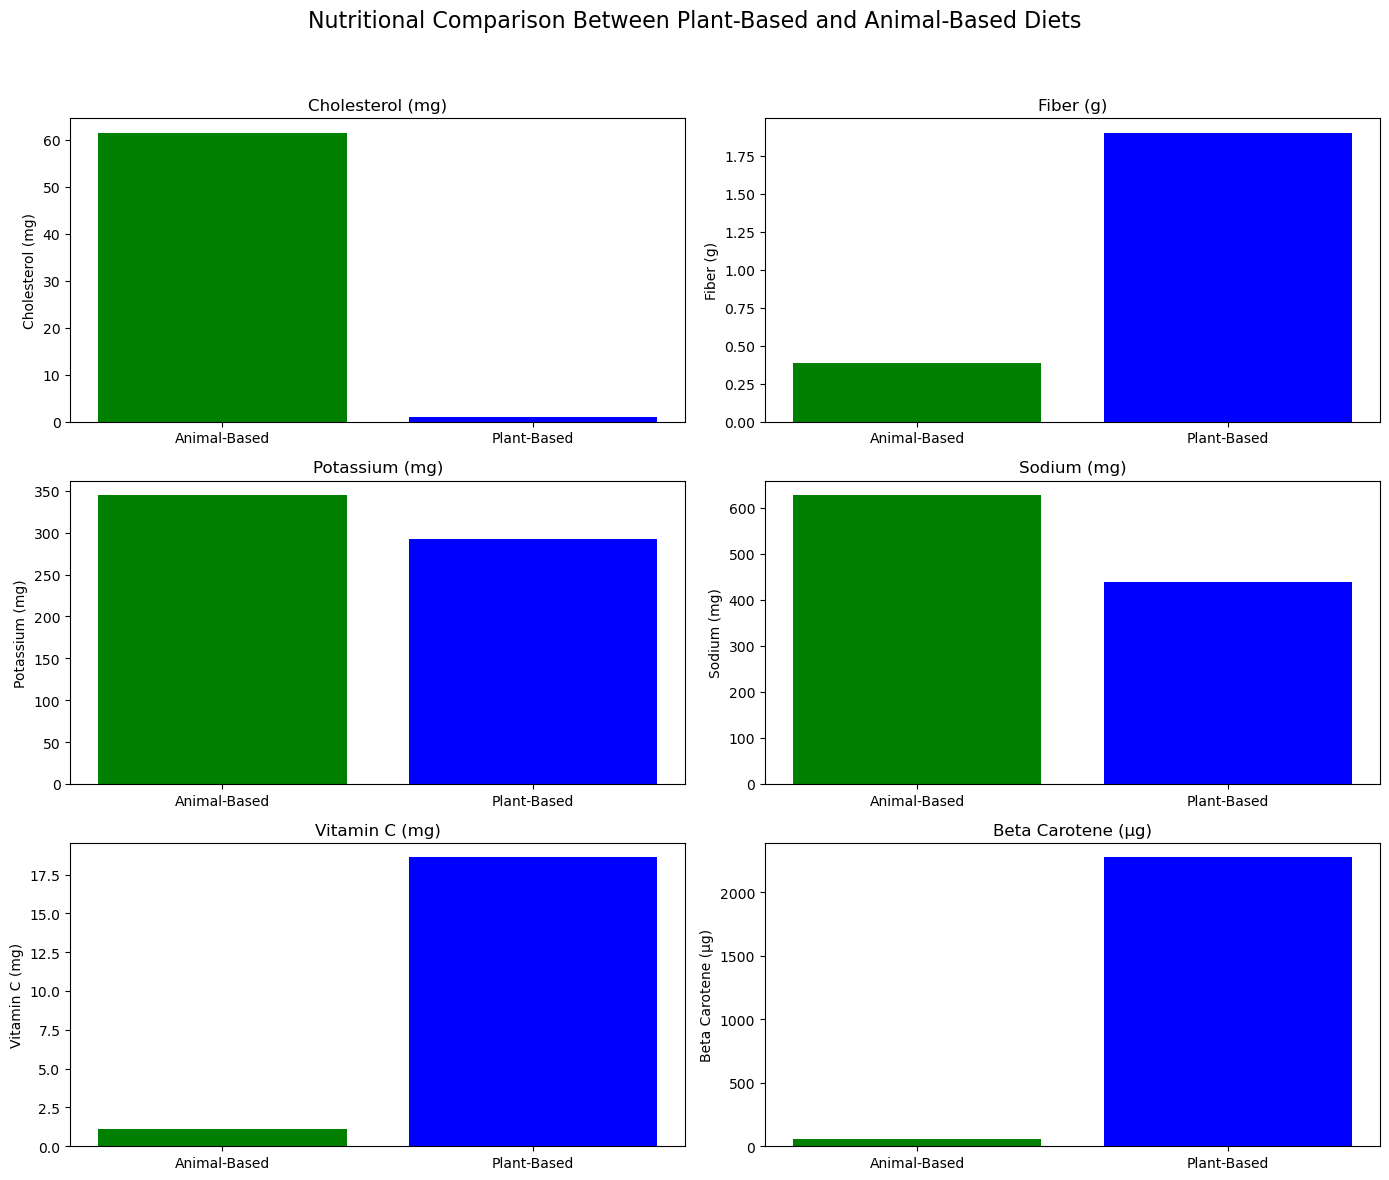

In [57]:
# Create a bar chart based on the correct column names
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Nutritional Comparison Between Plant-Based and Animal-Based Diets', fontsize=16)

# List of nutrients and labels
nutrient_labels = {
    'Avg_Cholesterol': 'Cholesterol (mg)',
    'Avg_Fiber': 'Fiber (g)',
    'Avg_Potassium': 'Potassium (mg)',
    'Avg_Sodium': 'Sodium (mg)',
    'Avg_Vitamin_C': 'Vitamin C (mg)',
    'Avg_Beta_Carotene': 'Beta Carotene (µg)'
}

# Iterate over nutrients and create subplots
for ax, (nutrient, label) in zip(axs.ravel(), nutrient_labels.items()):
    ax.bar(aggregated_data['Diet_Type'], aggregated_data[nutrient], color=['green', 'blue'])
    ax.set_title(label)
    ax.set_ylabel(label)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Here's whats important about the graphs I displayed above:

1. A lower cholesterol is important
2. A higher fiber is important
3. A lower sodium is important
4. Higher vitamins such as Carotene and Vitamin C are important
5. Higher minerals such as potassium are important

The biggest part of all of this is that plant-based diets hit almost all of these requirements. Plant-Based have higher vitamins, higher fiber, MUCH lower cholesterol, and lower sodium. The only check plant-based diets don't hit is the higher potassium but lets just say we could all eat some more bananas.

Now, I feel as if I've answered both of my questions with the confident answer of: plant-based diets are much better than animal-based diets. That being said, I will definitely continue to eat meat because i genuinely do enjoy it. But, I will say, I am going to try my absolute hardest to cut down on the amount of meat I do inevitably eat. I hope you do the same!

## references
1. Rober, Mark. “Feeding Bill Gates a Fake Burger (to Save the World).” YouTube, 12 Feb. 2020, www.youtube.com/watch?v=-k-V3ESHcfA.
2. Monday, Makeover. “2018/W50: Land Use by Food Type.” Data.world, data.world, 9 Dec. 2018, data.world/makeovermonday/2018w50. Accessed 20 Aug. 2024.
3. Monday, Makeover. “2020/W16: Food: Greenhouse Gas Emission across Supply Chain.” Data.world, data.world, 18 Apr. 2020, data.world/makeovermonday/2020w16. Accessed 20 Aug. 2024.
4. Whitcomb, Ryan . “CORGIS Datasets Project.” Corgis-Edu.github.io, 15 Oct. 2021, corgis-edu.github.io/corgis/csv/food/.